In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('athletes.csv')
df.head()

/Users/amygeraghty/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [2]:
df['medals won'] = df['gold'] + df['silver'] + df['bronze']
del df['gold']
del df['silver']
del df['bronze']
df['height'] = df['height'] * 3.28084
df['weight'] = df['weight'] * 2.20462
del df['id']
del df['name']
del df['nationality']
del df['info']

In [3]:
df = df.dropna()
df.head()

,sex,date_of_birth,height,weight,sport,medals won
0,male,1969-10-17,5.643045,141.09568,athletics,0
1,female,1986-09-23,5.511811,123.45872,fencing,0
2,male,1992-05-27,6.496063,174.16498,athletics,1
3,male,1991-01-02,6.003937,176.36960,taekwondo,0
4,male,1990-11-26,5.938320,156.52802,cycling,0


In [4]:
year = df["date_of_birth"].values
year = [my_str.split("-")[0] for my_str in year]
year
df["date_of_birth"] = list(map(int, year))
df['age'] = 2016 - df["date_of_birth"]
del df['date_of_birth']

In [5]:
df['medal winner'] = np.where(df['medals won']>=1, 1, 0)
del df['medals won']
del df['sport']
df.head()

,sex,height,weight,age,medal winner
0,male,5.643045,141.09568,47,0
1,female,5.511811,123.45872,30,0
2,male,6.496063,174.16498,24,1
3,male,6.003937,176.36960,25,0
4,male,5.938320,156.52802,26,0


In [6]:
data2 = pd.get_dummies(df, columns =['sex'])
data2['Medal Winner'] = df['medal winner']
del data2['medal winner']
del data2['sex_female']

In [7]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8143, 4)
(2715, 4)
(8143,)
(2715,)


In [11]:
predictions = LogRegr.predict(X_test)
predictions[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
predictions_Prob = LogRegr.predict_proba(X_test)[:,1]
predictions_Prob[0:10]

array([ 0.16173099,  0.16508649,  0.13880085,  0.22018525,  0.12019011,
        0.14264703,  0.11140551,  0.1638931 ,  0.1934844 ,  0.1589025 ])

Text(0,0.5,'Frequency')

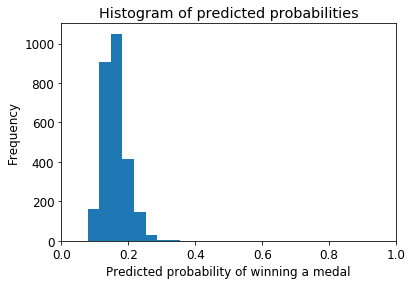

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.hist(predictions_Prob, bins = 8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of winning a medal')
plt.ylabel('Frequency')

In [14]:
from sklearn.preprocessing import binarize
predictions_Prob = predictions_Prob.reshape(1,-1)
y_pred_class = binarize(predictions_Prob, 0.2)[0]


In [15]:
y_pred_class[0:20]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.])

In [16]:
y_test.head(20)

7210     0
2257     0
181      0
4425     0
1575     0
3970     0
4273     0
6345     0
10329    0
7043     1
3977     0
4345     1
829      0
175      0
9252     0
6314     0
7432     0
3935     0
6461     0
4151     0
Name: Medal Winner, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[2029  243]
 [ 360   83]]


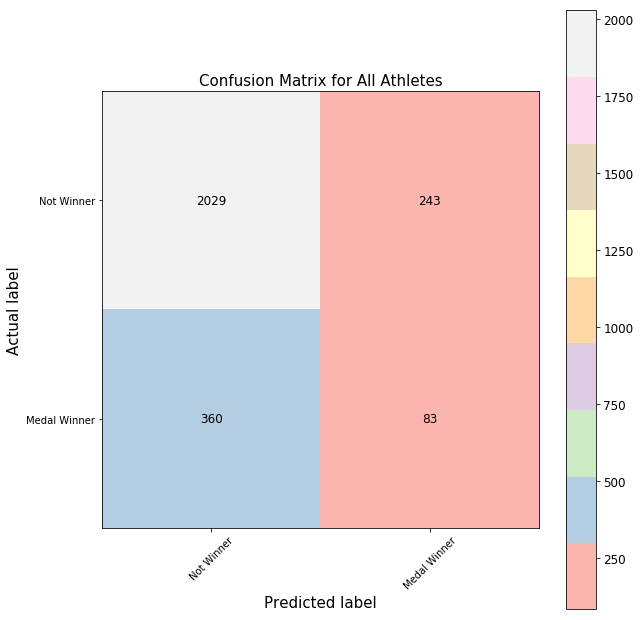

In [18]:
#Predicting medal winners for all athletes
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for All Athletes', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not Winner", "Medal Winner"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Not Winner", "Medal Winner"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()

In [19]:
#PLog medal winners for all athletes
score = LogRegr.score(X_test, y_test)
print(score)

0.836832412523


In [20]:
df2 = pd.read_csv('athletes.csv')

In [21]:
df2['medals won'] = df2['gold'] + df2['silver'] + df2['bronze']
del df2['gold']
del df2['silver']
del df2['bronze']
df2['height'] = df2['height'] * 3.28084
df2['weight'] = df2['weight'] * 2.20462

In [22]:
del df2['id']
del df2['name']
del df2['nationality']
del df2['info']
df2.head()

,sex,date_of_birth,height,weight,sport,medals won
0,male,1969-10-17,5.643045,141.09568,athletics,0
1,female,1986-09-23,5.511811,123.45872,fencing,0
2,male,1992-05-27,6.496063,174.16498,athletics,1
3,male,1991-01-02,6.003937,176.36960,taekwondo,0
4,male,1990-11-26,5.938320,156.52802,cycling,0


In [23]:
df2 = df2.dropna()
year = df2["date_of_birth"].values
year = [my_str.split("-")[0] for my_str in year]
year
df2["date_of_birth"] = list(map(int, year))
df2['age'] = 2016 - df2["date_of_birth"]
del df2['date_of_birth']
df2.head()

,sex,height,weight,sport,medals won,age
0,male,5.643045,141.09568,athletics,0,47
1,female,5.511811,123.45872,fencing,0,30
2,male,6.496063,174.16498,athletics,1,24
3,male,6.003937,176.36960,taekwondo,0,25
4,male,5.938320,156.52802,cycling,0,26


In [24]:
df2['medal winner'] = np.where(df2['medals won']>=1, 1, 0)
del df2['medals won']

In [25]:
data_aquatics = df2[df2['sport'] == "aquatics"]


In [26]:
del data_aquatics['sport']


In [27]:
data2 = pd.get_dummies(data_aquatics, columns =['sex'])
data2['Medal Winner'] = data_aquatics['medal winner']
del data2['medal winner']
del data2['sex_female']

In [28]:

X = data2.iloc[:,0:4]
y = data2.iloc[:,4]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1047, 4)
(349, 4)
(1047,)
(349,)


In [32]:
predictions = LogRegr.predict(X_test)
predictions[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
predictions_Prob = LogRegr.predict_proba(X_test)[:,1]
predictions_Prob[0:70]

array([ 0.23714002,  0.21486406,  0.17303404,  0.13772237,  0.14690006,
        0.18896057,  0.18635136,  0.22361848,  0.15608354,  0.15237701,
        0.13034228,  0.21357489,  0.17706752,  0.19207533,  0.22873862,
        0.22488529,  0.25729679,  0.20019138,  0.15917327,  0.16969955,
        0.23752967,  0.1483191 ,  0.19693763,  0.12411594,  0.28243969,
        0.22884503,  0.16036171,  0.10355177,  0.1997054 ,  0.17259671,
        0.17063341,  0.25724094,  0.16408472,  0.15246603,  0.41031207,
        0.20448717,  0.17521514,  0.14552827,  0.27223258,  0.1708853 ,
        0.23634185,  0.19507731,  0.2506796 ,  0.30742051,  0.12383392,
        0.16448098,  0.13509431,  0.20046924,  0.15958006,  0.18879731,
        0.12651279,  0.14947241,  0.23761346,  0.1363708 ,  0.27157329,
        0.1401128 ,  0.13180328,  0.18041024,  0.07919961,  0.21268442,
        0.15289387,  0.16491824,  0.1777862 ,  0.14353333,  0.1958801 ,
        0.35766289,  0.26263117,  0.18529343,  0.16366869,  0.23

Text(0,0.5,'Frequency')

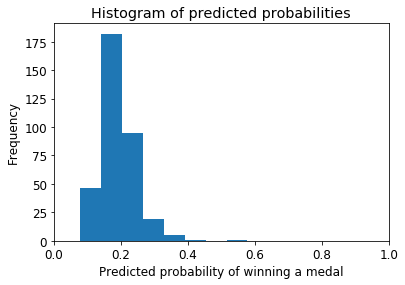

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.hist(predictions_Prob, bins = 8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of winning a medal')
plt.ylabel('Frequency')

In [35]:
from sklearn.preprocessing import binarize
predictions_Prob = predictions_Prob.reshape(1,-1)
y_pred_class = binarize(predictions_Prob, 0.25)[0]



In [40]:
predictions_Prob[0:20]

array([[ 0.23714002,  0.21486406,  0.17303404,  0.13772237,  0.14690006,
         0.18896057,  0.18635136,  0.22361848,  0.15608354,  0.15237701,
         0.13034228,  0.21357489,  0.17706752,  0.19207533,  0.22873862,
         0.22488529,  0.25729679,  0.20019138,  0.15917327,  0.16969955,
         0.23752967,  0.1483191 ,  0.19693763,  0.12411594,  0.28243969,
         0.22884503,  0.16036171,  0.10355177,  0.1997054 ,  0.17259671,
         0.17063341,  0.25724094,  0.16408472,  0.15246603,  0.41031207,
         0.20448717,  0.17521514,  0.14552827,  0.27223258,  0.1708853 ,
         0.23634185,  0.19507731,  0.2506796 ,  0.30742051,  0.12383392,
         0.16448098,  0.13509431,  0.20046924,  0.15958006,  0.18879731,
         0.12651279,  0.14947241,  0.23761346,  0.1363708 ,  0.27157329,
         0.1401128 ,  0.13180328,  0.18041024,  0.07919961,  0.21268442,
         0.15289387,  0.16491824,  0.1777862 ,  0.14353333,  0.1958801 ,
         0.35766289,  0.26263117,  0.18529343,  0.1

In [41]:
y_pred_class[0:20]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [42]:
y_test.head(20)

1188     1
1583     0
9849     0
3331     0
1081     0
8919     0
9915     1
1302     0
3151     0
2188     0
1263     0
6878     0
4253     0
10072    0
10242    1
5767     0
6317     0
8010     1
10207    0
2396     0
Name: Medal Winner, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[253  32]
 [ 54  10]]


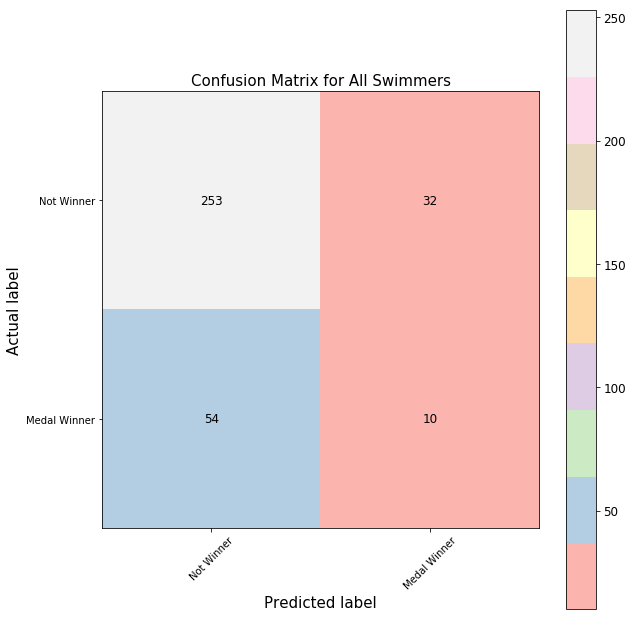

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for All Swimmers', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not Winner", "Medal Winner"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Not Winner", "Medal Winner"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()